In [8]:
from random import randint


class Node():

    def __init__(self, value = None):
        self.value = value
        self.next = None
        self.prev = None

    def __str__(self):
        return str(self.value)


class LinkedList():

    def __init__(self, value=None):
        self.head = None
        self.tail = None
    
    def __iter__(self):
        curNode = self.head
        while curNode:
            yield curNode
            curNode = curNode.next
    
    def __str__(self):
        values = [str(x) for x in self]
        return '->'.join(values)
    
    def __len__(self):
        result = 0
        node = self.head
        while node:
            result+=1
            node = node.next
        return result
    
    def add(self, value):
        newNode = Node(value)
        if self.head is None:
            self.head = newNode
            self.tail = newNode
        else:
            self.tail.next = newNode
            self.tail = newNode
        return self.tail
    
    def generate(self, n, min_value, max_value):
        self.head = None
        self.tail = None
        for i in range(n):
            self.add(randint(min_value, max_value))
        return self
    




In [9]:
customLL = LinkedList()
customLL.generate(10, 0, 99)
print(customLL)
print(len(customLL))

91->41->96->79->66->4->72->28->37->91
10


Write a function to remove duplicates from an unsorted linked list. Input 1 -> 2 -> 2 -> 3 -> 4 -> 4 -> 4 -> 5 Output 1 -> 2 -> 3 -> 4 -> 5

In [4]:
def remove_duplicates(ll):
    elements_set = set()
    temp_node = ll.head
    while temp_node and temp_node.next:
        elements_set.add(temp_node.value)
        next_node = temp_node.next
        if next_node.value in elements_set:
            # Skip the duplicate node
            temp_node.next = next_node.next
            if next_node == ll.tail:  # Update tail if the last node is removed
                ll.tail = temp_node
        else:
            temp_node = temp_node.next 




In [5]:
# Return Kth to last element

def nthToLast(ll, n):
    # Handle edge case for invalid input
    if n <= 0:
        print("Error: n must be greater than 0")
        return None
    forward = ll.head
    for i in range(n):
        if forward:
            forward = forward.next
        else:
            print("out of bounds error")
            return None
    res = ll.head
    while forward:
        forward = forward.next
        res = res.next
    return res



In [6]:
customLL = LinkedList()
customLL.generate(10, 9, 99)
print(customLL)

83->22->80->12->81->72->42->76->53->68


In [7]:
print(nthToLast(customLL, 1))

68


In [8]:
# write a code to partition a linked list around value x,
# such that all nodes less than x comes before all nodes grater than equal to x

def partition(ll, x):
    curNode = ll.head
    ll.tail = ll.head

    while curNode:
        nextNode = curNode.next
        curNode.next = None
        if curNode.value < x:
            curNode.next = ll.head
            ll.head = curNode
        else:
            ll.tail.next = curNode
            ll.tail = curNode
        curNode = nextNode
    
    if ll.tail.next is not None:
        ll.tail.next = None
        


In [21]:
customLL = LinkedList()
customLL.generate(5, 0 , 99)
print(customLL)
partition(customLL, 30)
print(customLL)

45->18->6->78->36
6->18->45->78->36


# sum lists
you have two numbers represented by a liked list, where each node contains a single digit. the digits of a number are stored in reverse order, such that 1's digit is at the head of the list. write a function that adds the two numbers and returns the sum as linked list

In [7]:
def sum_ll(ll1, ll2):
    n1 = ll1.head
    n2 = ll2.head
    carry = 0
    ll = LinkedList()
    while n1 or n2:
        result = carry
        if n1:
            result+=n1.value
            n1 = n1.next
        if n2:
            result+=n2.value
            n2 = n2.next
        ll.add(int(result%10))
        carry = result//10
    
    return ll
        
        



In [10]:
ll1 = LinkedList()
ll1.add(7)
ll1.add(1)
ll1.add(6)

ll2 = LinkedList()
ll2.add(5)
ll2.add(9)
ll2.add(2)


In [11]:
print(ll1)
print(ll2)
print(sum_ll(ll1, ll2))

7->1->6
5->9->2
2->1->9


5: Intersection
Given two singly linked lists, determine if two lists intersect, Return the intersecting node. 
Note that intersection is based on reference, not value. That is, if kth node of the first linked list
is exact same node (by reference) as the jth node of second linked list, then they are intersecting.

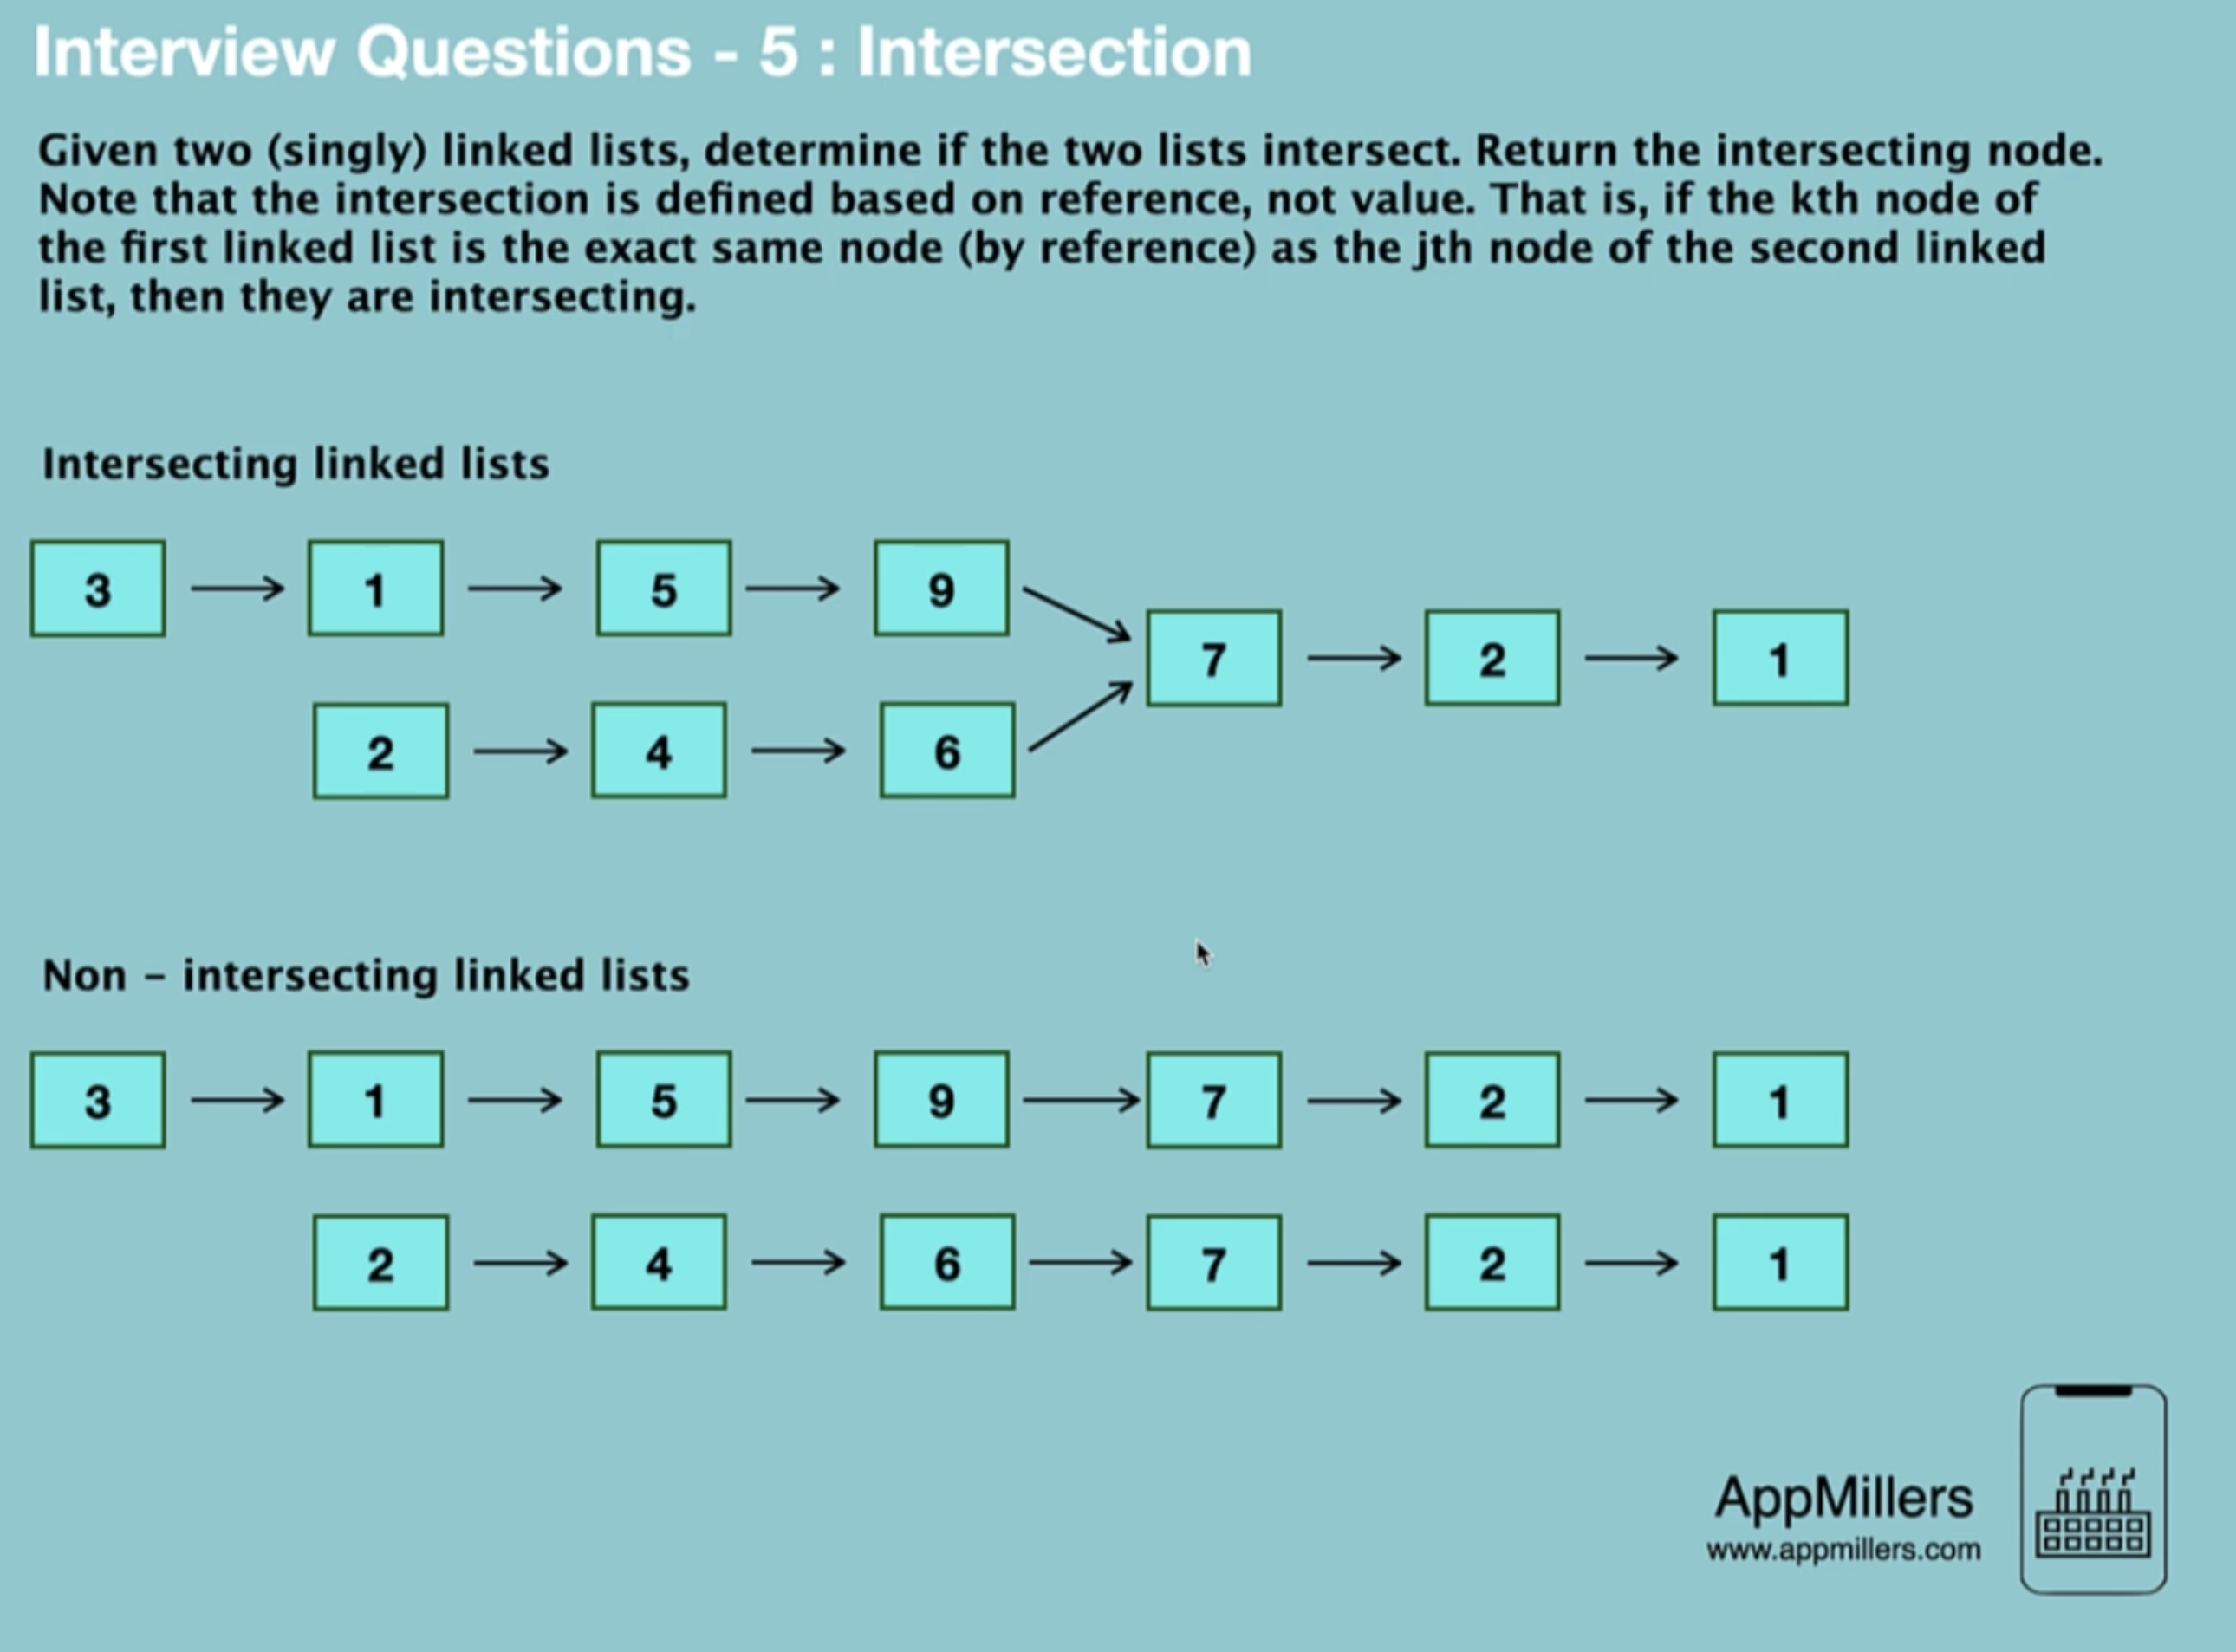

In [47]:
def intersection(ll1, ll2):
    if ll1.tail is not ll2.tail:
        return False
    len1 = len(ll1)
    len2 = len(ll2)
    shorter = ll1 if len1<len2 else ll2
    longer = ll2 if len1<len2 else ll1

    diff = len(longer)-len(shorter)

    n1 = longer.head
    n2 = shorter.head
    for i in range(diff):
        n1 = n1.next
        print('skip')
    
    while n1 is not n2:
        print(f"n1: {n1}, n2: {n2}")
        n1 = n1.next
        n2 = n2.next

    return n1
    

# helper
def addSameNode(llA, llB, value):
    temp_node = Node(value)
    llA.tail.next = temp_node
    llA.tail = temp_node
    llB.tail.next = temp_node
    llB.tail = temp_node
    

In [48]:
llA = LinkedList()
llA.generate(3, 0, 10)

llB = LinkedList()
llB.generate(3, 0, 10)

addSameNode(llA, llB, 11)
addSameNode(llA, llB, 14)

print(llA)
print(llB)

4->0->10->11->14
8->7->0->11->14


In [49]:
print(intersection(llA, llB))

n1: 4, n2: 8
n1: 0, n2: 7
n1: 10, n2: 0
11
